# 01-CIFAR10

![](https://images.unsplash.com/photo-1493723843671-1d655e66ac1c?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [LUM3N](https://unsplash.com/photos/-RBuQ2PK_L8)


We will work on the CIFAR10 dataset. If you want to know more about this dataset, you can check information [here](https://www.cs.toronto.edu/~kriz/cifar.html).

You can download the CIFAR10 dataset using Keras. To know how to do it, check [here](https://keras.io/datasets/). If the memory of your laptop is not big (e.g. 4GB), take only a subsample of the CIFAR10 dataset: for example 10000 samples in train and 2000 in test.

In [29]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:2000]
y_test = y_test[:2000]

Now inspect the data, check the number of images, their sizes, and display some of them.

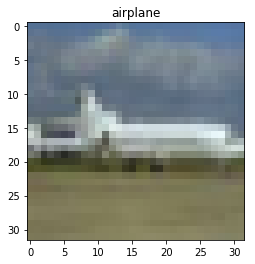

In [30]:
# TODO: Explore the data, display some input images
### STRIP_START ###
import matplotlib.pyplot as plt
import numpy as np

label_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[idx])#, cmap='gray_r')
plt.title(label_class[y_train[idx][0]])
plt.show()
### STRIP_END ###

Make the data preprocessing now: rescale the input data, put the labels to one hot encoding.

In [31]:
# TODO: Make the data preparation
### STRIP_START ###
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

X_train = X_train/255.
X_test = X_test/255.

X_train = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
X_test = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))
### STRIP_END ###

Now build your model with Keras. Build your neural network architecture.

Again, begin with a quite light architecture with 3 hidden layers and 30 units per layer.

In [32]:
# TODO: Build your model
### STRIP_START ###
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

def my_model(input_dim, regul):
    # Create the Sequential object
    model = Sequential()

    # Add the first Dense layers of 10 units with the input dimension
    model.add(Dense(30, input_dim=input_dim, name="0", activation='relu', kernel_regularizer=regularizers.l2(regul)))
    model.add(Dense(30, activation='relu', name="1", kernel_regularizer=regularizers.l2(regul)))
    model.add(Dense(30, activation='relu', name="2", kernel_regularizer=regularizers.l2(regul)))

    # Add the output layer with one unit: the predicted result
    model.add(Dense(10, activation='softmax', name="3", kernel_regularizer=regularizers.l2(regul)))
    
    return model
### STRIP_END ###

Now compile and fit your model on your training data. Add callbacks to have early stopping (with a patience of 30 epochs for example) and tensorboard information.

In [33]:
# TODO: Build your model
### STRIP_START ###
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard

# Define the model with regularization
model = my_model(input_dim=X_train.shape[1], regul=0.0)
model.compile(optimizer='adam', loss='categorical_crossentropy')

# Define now our callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=30),
             TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]

# Finally fit the model
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=callbacks)
### STRIP_END ###

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
10000/10000 [==============================] - 1s 90us/step - loss: 2.2072 - val_loss: 2.1879
Epoch 2/100
10000/10000 [==============================] - 1s 57us/step - loss: 2.0233 - val_loss: 1.9706
Epoch 3/100
10000/10000 [==============================] - 1s 57us/step - loss: 1.9542 - val_loss: 1.9427
Epoch 4/100
10000/10000 [==============================] - 1s 63us/step - loss: 1.9326 - val_loss: 1.9167
Epoch 5/100
10000/10000 [==============================] - 1s 56us/step - loss: 1.9107 - val_loss: 1.9642
Epoch 6/100
10000/10000 [==============================] - 1s 55us/step - loss: 1.9055 - val_loss: 1.9028
Epoch 7/100
10000/10000 [==============================] - 1s 55us/step - loss: 1.8944 - val_loss: 1.8948
Epoch 8/100
10000/10000 [==============================] - 1s 54us/step - loss: 1.8869 - val_loss: 1.9472
Epoch 9/100
10000/10000 [==============================] - 1s 68us/step - loss: 1.8781 - val_loss: 1.89

Compute the accuracy of your model once it has been trained.

In [34]:
# TODO: Compute the accuracy of your model
### STRIP_START ###
from sklearn.metrics import accuracy_score

y_pred_train = to_categorical(model.predict(X_train).argmax(axis=1), num_classes=10)
y_pred_test = to_categorical(model.predict(X_test).argmax(axis=1), num_classes=10)

print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test))
### STRIP_END ###

accuracy on train with NN: 0.387
accuracy on test with NN: 0.3525


What do you think of those results? Can you improve it by changing the number of layers? Of units per layer? The number of epochs? Feel free to try.

To have a better understanding of your model, you can also check the learning curves on TensorBoard and interpret them.

One solution to improve your model might be data augmentation. For example, we can flip horizontally our images. Basically, this would be like watching them into a mirror.

To do so, you can use numpy method `flip` for example, and then display a flipped image and the regular image.

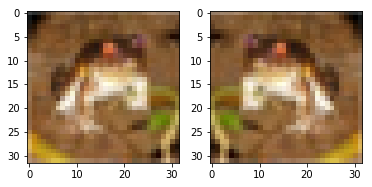

In [11]:
# TODO: Augment your data by flipping images horizontally
### STRIP_START ###
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:2000]
y_test = y_test[:2000]

plt.subplot(1, 2, 1)
plt.imshow(X_train[0])#, cmap='gray_r')


plt.subplot(1, 2, 2)
plt.imshow(np.flip(X_train, axis=2)[0])#, cmap='gray_r')
### STRIP_END ###

Now concatenate your training set to have both regular and flipped images in it. Do the same for the associated labels (labels remain the same for flipped images). If your computer memory is not big enough, flip only a subsample of images.

In [12]:
# TODO: Create a new training set with both regular and flipped images
### STRIP_START ###
from keras.utils import to_categorical

# flip images
flipped = np.flip(X_train, axis=2)

# concantenate 
X_train = np.concatenate([X_train, flipped], axis=0)
y_train = np.concatenate([y_train, y_train], axis=0)

# preprocess
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

X_train = X_train/255.
X_test = X_test/255.

X_train = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
X_test = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))
### STRIP_END ###

Once your data is augmented, retrain your model, and see if it can improve your performances.

In [13]:
# TODO: train your model and display the performances
### STRIP_START ###

# Finally fit the model
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=callbacks)

# Compute and print the accuracy
y_pred_train = to_categorical(model.predict(X_train).argmax(axis=1), num_classes=10)
y_pred_test = to_categorical(model.predict(X_test).argmax(axis=1), num_classes=10)

print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test))

### STRIP_END ###

Train on 20000 samples, validate on 2000 samples
Epoch 1/100
20000/20000 [==============================] - 1s 56us/step - loss: 2.0706 - val_loss: 1.9930
Epoch 2/100
20000/20000 [==============================] - 1s 51us/step - loss: 1.8868 - val_loss: 1.8529
Epoch 3/100
20000/20000 [==============================] - 1s 51us/step - loss: 1.8302 - val_loss: 1.8135
Epoch 4/100
20000/20000 [==============================] - 1s 51us/step - loss: 1.7988 - val_loss: 1.7981
Epoch 5/100
20000/20000 [==============================] - 1s 51us/step - loss: 1.7671 - val_loss: 1.8078
Epoch 6/100
20000/20000 [==============================] - 1s 65us/step - loss: 1.7448 - val_loss: 1.7586
Epoch 7/100
20000/20000 [==============================] - 1s 55us/step - loss: 1.7166 - val_loss: 1.7476
Epoch 8/100
20000/20000 [==============================] - 1s 55us/step - loss: 1.7006 - val_loss: 1.7559
Epoch 9/100
20000/20000 [==============================] - 1s 52us/step - loss: 1.6915 - val_loss: 1.75

Does it improve your performances? On my side yes it does, from 34% accuracy to 41%, quite a big improvement (even if this is not so good).

Now feel free to improve the performances of your model by making more data augmentation (adding rotations, zooming...), trying to add layers or units, or playing with hyperparameters.